# Coursera

## Data-Driven Astronomy

### 1. Calculating Mean of a Image Stack (.fits files)

In [1]:
# Required libraries

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
# Using Numpy to get back basic stats

fluxes = np.array([23.3, 42.1, 2.0, -3.2, 55.6])
mean = np.mean(fluxes) # mean
size = np.size(fluxes) # length of array
std_dev = np.std(fluxes)  # standard deviation
print(mean, size, std_dev)

23.96 5 22.585358088814974


In [3]:
# Reading data from .csv files

# np.loadtxt saves the data in numpy array formats

data = np.loadtxt('data1.csv', delimiter=',')
print(data)

[[ 7.98631 16.82952 19.65165]
 [ 7.1446  10.41674  3.81853]
 [ 7.48549 14.61958  8.87193]
 [ 8.66521 14.14244 10.10248]
 [14.80968 12.82048 13.41792]]


In [4]:
# Calculating the mean and median of array and rounding it to one decimal place

mean = np.mean(data)
median = np.median(data)
  
print(np.round(mean,1), np.round(median,1))

11.4 10.4


In [5]:
# Accessing the array

# Print first row of data:
print(data[0,:])

# Print second column of data:
print(data[:,1])

[ 7.98631 16.82952 19.65165]
[16.82952 10.41674 14.61958 14.14244 12.82048]


In [6]:
# Function for calculating the mean of several data files

def mean_datasets(files):
    n = len(files)
    
    if n > 0 :
        data = np.loadtxt(files[0], delimiter = ',')
        
        for i in range(1,n):
            data += np.loadtxt(files[i], delimiter = ',')
    
        data_mean = data / n
  
    return np.round(data_mean, 1)

In [7]:
files = ['data1.csv', 'data2.csv', 'data3.csv']
x = mean_datasets(files)
print(x)

[[11.   9.3 13.4]
 [11.8  8.8 11.8]
 [11.7 10.8 13. ]
 [13.4  8.9  8.3]
 [16.9  4.3 11.2]]


In [8]:
# FITS (Flexible Image Transport System)
# FITS files have headers which store metadata about the image. The following code extracts the header info from the fits file

from astropy.io import fits
hdulist = fits.open('image0.fits')
hdulist.info()

Filename: image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  XY72.hdr      1 PrimaryHDU     658   (2423, 2434)   int16 (rescales to uint16)   


Opening a FITS file in Astropy returns a HDU (Header/Data Unit) list. Each HDU stores headers and (optionally) image data.

The header contains metadata about the HDU object, e.g. its dimensions and data type. Every HDU can contain image data. The first HDU is called the primary HDU.

If we want to access individual HDUs, we can index the HDU list object returned by fits.open. The image data can be accessed using the data attribute:

In [9]:
from astropy.io import fits

hdulist = fits.open('image0.fits')
data = hdulist[0].data

# data.shape gives the dimensions of the image in the primary HDU
print(data.shape)

(2434, 2423)


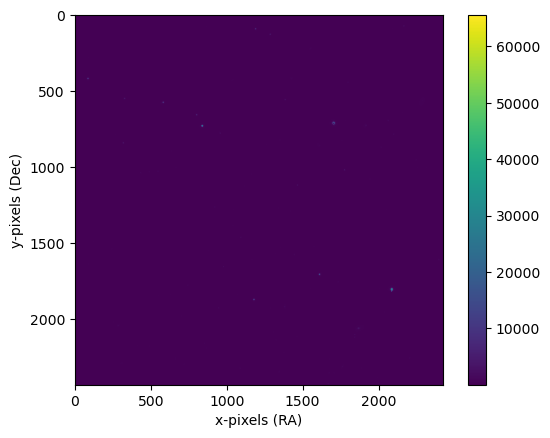

In [10]:
from astropy.io import fits
import matplotlib.pyplot as plt

hdulist = fits.open('image0.fits')
data = hdulist[0].data

# Plot the 2D array
plt.imshow(data, cmap=plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

In [11]:
# Function to find the brightest pixel in the image data

from astropy.io import fits
import numpy as np

def load_fits(file):
    hdulist = fits.open(file) # opens fits file
    data = hdulist[0].data # accessing datafrom fits file
    
    arg_max = np.argmax(data) # searches for the largest value in the array and returns its position
    max_pos = np.unravel_index(arg_max, data.shape) # unravells the 1D result of argmax into x-y coordinates

    return max_pos

In [12]:
load_fits('image0.fits')

(776, 955)

In [13]:
# Function to calc the mean of fits files


from astropy.io import fits
import numpy as np

def mean_fits(files):
   
  n = len(files)
  
  if n > 0:
    hdulist = fits.open(files[0])
    data = hdulist[0].data
    hdulist.close() # By calling hdulist.close() we free up the memory this file has taken up while we were working with it.
    
    for i in range(1,n):
        hdulist = fits.open(files[i])
        data += hdulist[0].data
        hdulist.close()
  
    mean = data / n
    return mean

In [14]:
fits_files = ['image0.fits', 'image1.fits', 'image2.fits', 'image3.fits']
mean_fits(fits_files) # returns an array of mean values for all x-y coord

array([[161.5 , 161.  , 160.5 , ..., 160.5 , 160.5 , 160.5 ],
       [160.75, 160.25, 160.  , ..., 161.  , 160.75, 160.25],
       [160.75, 160.  , 160.  , ..., 160.  , 160.75, 161.  ],
       ...,
       [160.75, 160.25, 160.25, ..., 160.75, 161.  , 161.  ],
       [161.  , 160.5 , 160.5 , ..., 160.75, 161.25, 160.5 ],
       [160.5 , 160.  , 160.5 , ..., 160.5 , 160.25, 161.  ]])

In [15]:
mean_fits(fits_files)[1000,234] # returns mean values at the given coord

141.0